neg_log_loss
ET: -2.609916 (1.050625)
RF: -0.174584 (0.189805)
CatB: -0.090181 (0.057098)
lgbm: -0.116740 (0.092121)
xgb: -0.088868 (0.064392)
ridge: nan (nan)
GBC: -0.111344 (0.078956)
ADA: -0.452562 (0.039828)
LR: -0.136527 (0.055913)
LDA: -0.134018 (0.114189)
KNN: -0.840060 (0.394739)
SVM: -0.213813 (0.120535)
CART: -2.368612 (1.135305)
NB: -0.616162 (0.447197)
QDA: -0.398461 (0.298593)
DC: -0.676188 (0.114749)


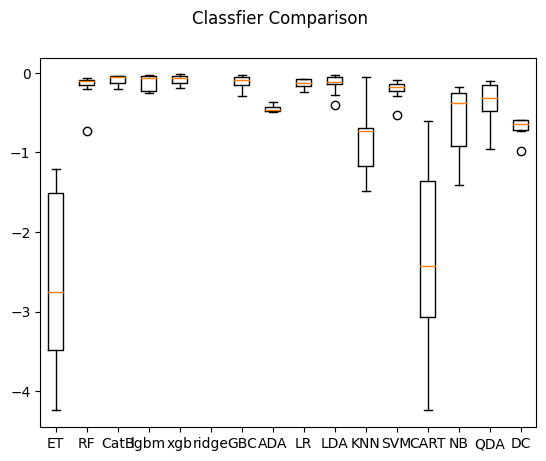

In [1]:

# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#Load Dataset
x_data, y_data = load_breast_cancer(return_X_y=True)
x_data = pd.DataFrame(x_data.astype('float64'))
# append models
models = []
models.append(('ET', ExtraTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('CatB', CatBoostClassifier(verbose=False)))
models.append(('lgbm', LGBMClassifier(verbose=-1)))
models.append(('xgb', XGBClassifier()))
models.append(('ridge',  RidgeClassifier()))
models.append(('GBC',  GradientBoostingClassifier()))
models.append(('ADA',  AdaBoostClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('DC', DummyClassifier()))
results = []
results_std = []
names = []
scoring = 'neg_log_loss'
print(scoring)
# Set Cross-Validation
#Remember: Better use Stratified Kfold, if advised
kfold = model_selection.KFold(n_splits=10, random_state=None)
for name, model in models:   
    cv_results = model_selection.cross_val_score(model, x_data, y_data, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #results_std.append(cv_results.std())
    mean_scoring = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(mean_scoring)
# Create a Dataframe with the results for possible later processing
#df_SpotonCheck = pd.DataFrame({'name': names, 'Logloss': results, 'Std': results_std})
# Classifier Comparision Boxplot
fig = plt.figure()
fig.suptitle('Classfier Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
